<a href="https://colab.research.google.com/github/lizfangwenxin/AI/blob/master/MNIST_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the MNIST data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.datasets import fetch_openml
from scipy.stats import gaussian_kde

import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
#from keras.datasets import mnist

#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# plot the embeddings using colored scatter plot
def plot_embedding(X, y, title):
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral,s=1)
    plt.title(title)
    plt.xlabel("Principle Component 1")
    plt.ylabel("Principle Component 2")
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
    plt.show()

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate([X_train, X_test], axis=0)[0:15000] #25000 my computer crash, 15000 works fine
y = np.concatenate([y_train, y_test], axis=0)[0:15000]
X_scaled = X.reshape(-1,X.shape[1]*X_train.shape[2])/255
#scaler=StandardScaler()
#X_scaled = scaler.fit_transform(X.reshape(-1, 28 * 28)) # The result of standard scaler seems wierd

# 80:20 split with stratification for label balance
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)



# Confirm shape and distribution
print(f"Training set shape: {X_tr.shape}, Labels: {y_tr.shape}")
print(f"Test set shape: {X_te.shape}, Labels: {y_te.shape}")

Training set shape: (12000, 784), Labels: (12000,)
Test set shape: (3000, 784), Labels: (3000,)


**2.4.2 Finding PCA embeddings (rbf and linear)**

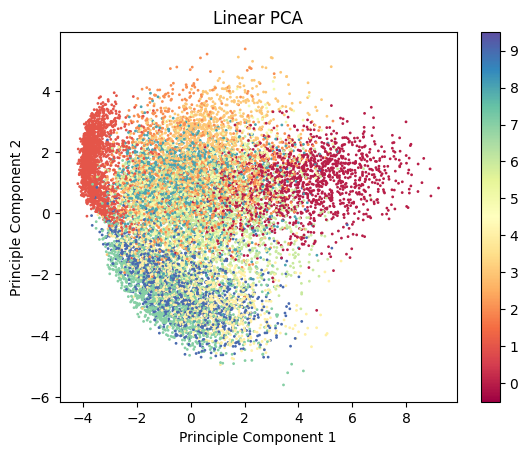

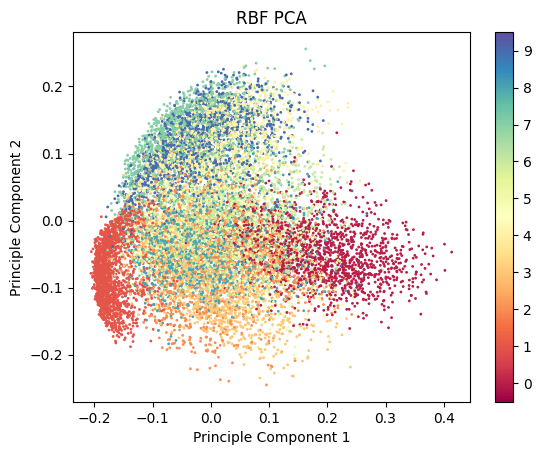

In [ ]:
# Standard Linear PCA
pca_linear = PCA(n_components=2)
pca_linear_embedding = pca_linear.fit_transform(X_scaled)
plot_embedding(pca_linear_embedding, y, "Linear PCA")

pca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=None, random_state=42, fit_inverse_transform=True)
pca_rbf_embedding = pca_rbf.fit_transform(X_scaled)
plot_embedding(pca_rbf_embedding, y, "RBF PCA")

The boundaries between different clusters are not clear using PCA, if the plot is not colored, we will not be able to seperate different clusters.

**2.4.3 Finding embeddings using LLE**

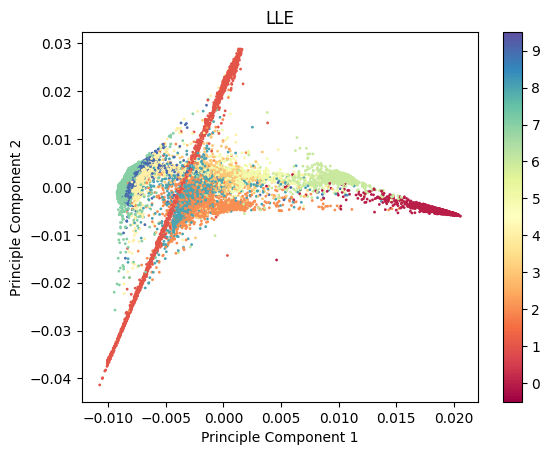

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle_embedding = lle.fit_transform(X_scaled)
plot_embedding(lle_embedding, y, "LLE")

The clustering is a bit better than PCA, but till not very informative.

**2.4.5 Finding embeddings using t-SNE**

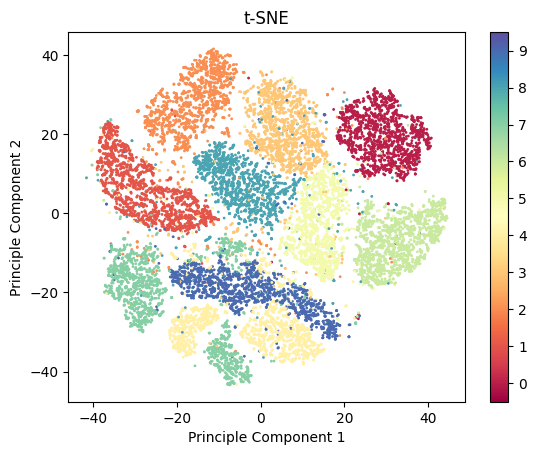

In [ ]:
tsne=TSNE(n_iter=500,random_state=42)
tsne_embedding = tsne.fit_transform(X_scaled)
plot_embedding(tsne_embedding, y, "t-SNE")

**2.4.6 Application of KNN classifier to the 2-dimensional embeddings**

**2.4.6a: Application of KNN to PCA embeddings**

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(
    pca_linear_embedding, y, test_size=0.2, stratify=y, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
y_pred_pca_knn = knn.predict(X_te)
print("\n PCA_Linear_KNN Accuracy:", accuracy_score(y_te, y_pred_pca_knn))
print(classification_report(y_te, y_pred_pca_knn, digits=3))

X_tr, X_te, y_tr, y_te = train_test_split(
    pca_rbf_embedding, y, test_size=0.2, stratify=y, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
y_pred_rbf_knn = knn.predict(X_te)
print("\n PCA_RBF_KNN Accuracy:", accuracy_score(y_te, y_pred_rbf_knn))
print(classification_report(y_te, y_pred_rbf_knn, digits=3))


 PCA_Linear_KNN Accuracy: 0.41733333333333333
              precision    recall  f1-score   support

           0      0.611     0.799     0.693       299
           1      0.841     0.926     0.882       338
           2      0.227     0.257     0.241       292
           3      0.418     0.430     0.424       309
           4      0.338     0.449     0.385       294
           5      0.185     0.167     0.175       264
           6      0.247     0.215     0.230       298
           7      0.444     0.423     0.433       319
           8      0.251     0.178     0.209       286
           9      0.340     0.219     0.267       301

    accuracy                          0.417      3000
   macro avg      0.390     0.406     0.394      3000
weighted avg      0.400     0.417     0.404      3000


 PCA_RBF_KNN Accuracy: 0.4076666666666667
              precision    recall  f1-score   support

           0      0.583     0.766     0.662       299
           1      0.818     0.920     0.86

**2.4.6d: Application of KNN to t-SNE and LLE embeddings**

In [ ]:
#tsne=TSNE(n_iter=300,random_state=42)
#tsne_embedding = tsne.fit_transform(X_scaled)
X_tr, X_te, y_tr, y_te = train_test_split(
    tsne_embedding, y, test_size=0.2, stratify=y, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
y_pred_tsne_knn = knn.predict(X_te)
#models["TSNE_KNN"] = knn
#y_preds["TSNE_KNN"] = y_pred_knn
print("\n TSNE_KNN Accuracy:", accuracy_score(y_te, y_pred_tsne_knn))
print(classification_report(y_te, y_pred_tsne_knn, digits=3))

X_tr, X_te, y_tr, y_te = train_test_split(
    lle_embedding, y, test_size=0.2, stratify=y, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
y_pred_lle_knn = knn.predict(X_te)
print("\n LLE_KNN Accuracy:", accuracy_score(y_te, y_pred_lle_knn))
print(classification_report(y_te, y_pred_lle_knn, digits=3))



 TSNE_KNN Accuracy: 0.9516666666666667
              precision    recall  f1-score   support

           0      0.993     0.987     0.990       299
           1      0.931     0.997     0.963       338
           2      0.982     0.959     0.971       292
           3      0.947     0.922     0.934       309
           4      0.934     0.922     0.928       294
           5      0.933     0.951     0.942       264
           6      0.967     0.987     0.977       298
           7      0.965     0.950     0.957       319
           8      0.950     0.923     0.936       286
           9      0.917     0.914     0.915       301

    accuracy                          0.952      3000
   macro avg      0.952     0.951     0.951      3000
weighted avg      0.952     0.952     0.952      3000


 LLE_KNN Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

           0      0.977     0.973     0.975       299
           1      0.860     0.982     0.917       338

**Add discussion of your observations and your process here:**  

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test), axis=0)
X = X.reshape(X.shape[0], -1)
X = X.astype('float32') / 255.0

In [ ]:
from sklearn.neighbors import KernelDensity
# Write the function from scratch

'''This function takes: N, the number of samples to draw, the input data (k-dimensional PCA embeddings), and
    the bandwidth for kernel density estimation;
    The output of this function should be the N samples drawn from a distribution whose pdf is given by the KDE'''

def sample_gauss_KDE(N,data,bandwidth):
  #kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data)
  n_points, n_dimensions = data.shape
  samples = np.zeros((N, n_dimensions))

  center_indices = np.random.choice(n_points, N, replace=True)
  centers = data[center_indices]

  noise = np.random.normal(0, bandwidth, size=(N, n_dimensions))
  samples = centers + noise
  #return kde.sample(N)
  return samples

In [ ]:
# Write the function from scratch
def image_reconst(eig_vectors,mean_vector,samples):
  '''This function takes: the number k of eigen_vectors used in the reconstruction; the k eigenvectors you use in
   the reconstruction and samples drawn with sample_gauss_KDE'''
  image = np.dot(samples, eig_vectors) + mean_vector

  return image
  #return pca_model.inverse_transform(kde_samples)

Plot the 12 newly constructed figures

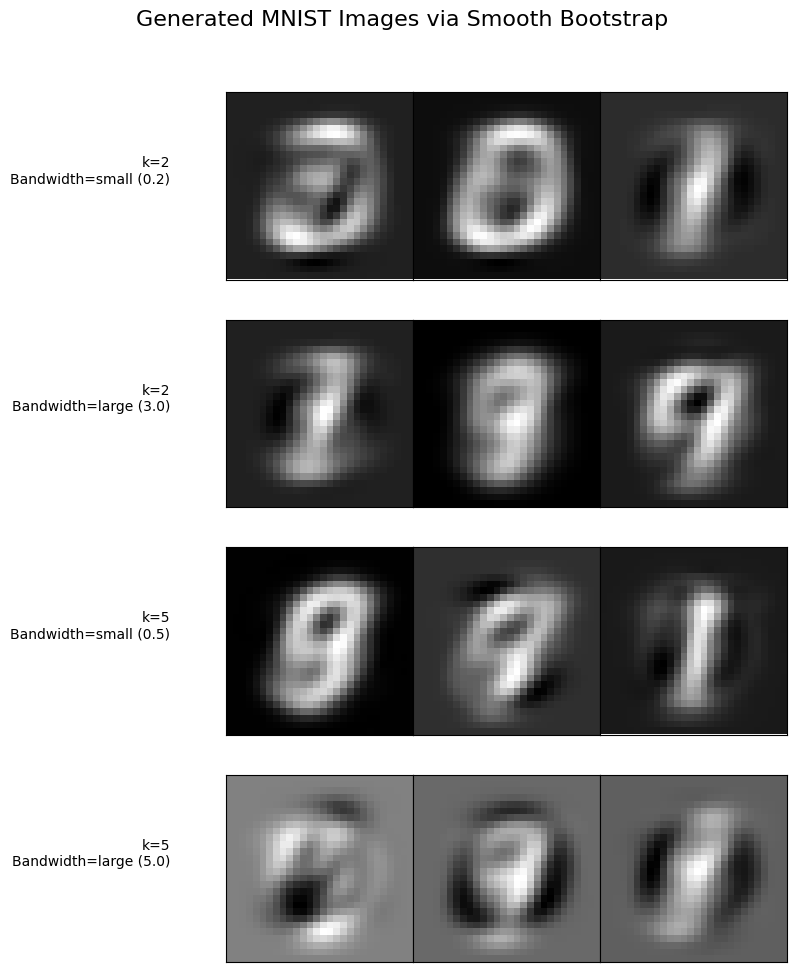

In [ ]:
np.random.seed(42)
K = [2,5] # k values
n = 3 # number of images
bandwidths = {
    2: {'small':0.2, 'large':3.0},
    5: {'small':0.5, 'large':5.0}
}

# 4x3 figures
fig, axes = plt.subplots(4, n, figsize=(8, 10))
fig.suptitle('Generated MNIST Images via Smooth Bootstrap', fontsize=16)
plot_row = 0

for k in K:
  pca = PCA(n_components=k)
  pca_embedding = pca.fit_transform(X)

  for bandwidth_key, bandwidth_value in bandwidths[k].items():
    # draw samples from gaussKDE
    sample = sample_gauss_KDE(N=n, data = pca_embedding, bandwidth=bandwidth_value)
    # image reconstruct
    images = image_reconst(pca.components_, pca.mean_, sample)
    #images = pca.inverse_transform(sample)
    # plot the images
    for i in range (n):
      ax = axes[plot_row, i]
      ax.imshow(images[i].reshape(28, 28), cmap='gray')
      ax.set_xticks([])
      ax.set_yticks([])
      if i == 0:
          ax.set_ylabel(f'k={k}\nBandwidth={bandwidth_key} ({bandwidth_value})', rotation=0, labelpad=40, ha='right')

    plot_row += 1

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()